# Gender Prediction By Name

In [ ]:
!pip install names-dataset
!pip install Faker

In [ ]:
!pip install matplotlib

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json
from collections import Counter

In [6]:
from names_dataset import NameDataset
from faker import Faker
fake = Faker(['en_US','fa'])
nd = NameDataset()

# Make a fake data frame

In [7]:
df = pd.DataFrame(
    {
    "people" : [fake.name() for _ in range(1000)],
    }
)

In [8]:
df

,people
0,Joshua Reyes
1,عرفان علی پور
2,Danny Mcintosh
3,جناب آقای علیرضا چنگیزی
4,Eddie Mcdaniel DVM
...,...
995,جناب آقای دکتر عرفان تنزیلی
996,محمد مهدی جعفر پور
997,یوسف مهدیان
998,Emily Kennedy


## split full_name to first_name and last_name

In [9]:
def extract_name_parts(full_name):
    # Use regular expression to find titles and suffixes
    title_suffix_pattern = r'\b(?:Mr\.|Mrs\.|Ms\.|Dr\.|DVM|MD|جناب|آقای|دکتر|خانم|سرکار)\s?\b'

    # Remove titles and suffixes from the full name
    name_without_title_suffix = re.sub(title_suffix_pattern, '', full_name, flags=re.IGNORECASE)

    # Split the name into words
    words = name_without_title_suffix.split()

    # First name is the combination of all words except the last one
    first_name = ' '.join(words[:-1])

    # Last name is the last word
    last_name = words[-1]

    return first_name, last_name

### Add first name and last name column to data frame

In [10]:
df['first name'] = df['people'].apply(lambda fn : extract_name_parts(fn)[0])
df['last name'] = df['people'].apply(lambda ln : extract_name_parts(ln)[1])
df

,people,first name,last name
0,Joshua Reyes,Joshua,Reyes
1,عرفان علی پور,عرفان علی,پور
2,Danny Mcintosh,Danny,Mcintosh
3,جناب آقای علیرضا چنگیزی,علیرضا,چنگیزی
4,Eddie Mcdaniel DVM,Eddie,Mcdaniel
...,...,...,...
995,جناب آقای دکتر عرفان تنزیلی,عرفان,تنزیلی
996,محمد مهدی جعفر پور,محمد مهدی جعفر,پور
997,یوسف مهدیان,یوسف,مهدیان
998,Emily Kennedy,Emily,Kennedy


## finding gender method

In [11]:
def name_to_gender(first_name):
    info = nd.search(first_name)['first_name']
    if info is None:
        return
    return max(info['gender'], key=info['gender'].get)

In [12]:
def name_to_gender_probability(first_name):
    info = nd.search(first_name)['first_name']
    if info is None:
        return
    return info['gender'][max(info['gender'], key=info['gender'].get)]

### add gender column to data frame

In [13]:
df['gender'] = df['first name'].apply(lambda name : name_to_gender(name))

In [14]:
df['gender probablity'] = df['first name'].apply(lambda name : name_to_gender_probability(name))

In [15]:
df

,people,first name,last name,gender,gender probablity
0,Joshua Reyes,Joshua,Reyes,Male,0.987
1,عرفان علی پور,عرفان علی,پور,None,NaN
2,Danny Mcintosh,Danny,Mcintosh,Male,0.911
3,جناب آقای علیرضا چنگیزی,علیرضا,چنگیزی,Male,0.973
4,Eddie Mcdaniel DVM,Eddie,Mcdaniel,Male,0.984
...,...,...,...,...,...
995,جناب آقای دکتر عرفان تنزیلی,عرفان,تنزیلی,Male,0.957
996,محمد مهدی جعفر پور,محمد مهدی جعفر,پور,None,NaN
997,یوسف مهدیان,یوسف,مهدیان,Male,0.947
998,Emily Kennedy,Emily,Kennedy,Female,0.991


## finding country method

In [16]:
def name_to_country(first_name):
    info = nd.search(first_name)['first_name']
    if info is None:
        return
    return max(info['country'], key=info['country'].get)

In [17]:
def name_to_country_probability(first_name):
    info = nd.search(first_name)['first_name']
    if info is None:
        return
    return info['country'][max(info['country'], key=info['country'].get)]

### add country column to data frame

In [18]:
df['country'] = df['first name'].apply(lambda name : name_to_country(name))

In [19]:
df['country probablity'] = df['first name'].apply(lambda name : name_to_country_probability(name))

In [20]:
df

,people,first name,last name,gender,gender probablity,country,country probablity
0,Joshua Reyes,Joshua,Reyes,Male,0.987,United States,0.510
1,عرفان علی پور,عرفان علی,پور,None,NaN,None,NaN
2,Danny Mcintosh,Danny,Mcintosh,Male,0.911,United States,0.332
3,جناب آقای علیرضا چنگیزی,علیرضا,چنگیزی,Male,0.973,"Iran, Islamic Republic of",0.920
4,Eddie Mcdaniel DVM,Eddie,Mcdaniel,Male,0.984,United States,0.501
...,...,...,...,...,...,...,...
995,جناب آقای دکتر عرفان تنزیلی,عرفان,تنزیلی,Male,0.957,Saudi Arabia,0.240
996,محمد مهدی جعفر پور,محمد مهدی جعفر,پور,None,NaN,None,NaN
997,یوسف مهدیان,یوسف,مهدیان,Male,0.947,"Iran, Islamic Republic of",0.338
998,Emily Kennedy,Emily,Kennedy,Female,0.991,United States,0.464


In [21]:
df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1})

In [22]:
df

,people,first name,last name,gender,gender probablity,country,country probablity
0,Joshua Reyes,Joshua,Reyes,0.0,0.987,United States,0.510
1,عرفان علی پور,عرفان علی,پور,NaN,NaN,None,NaN
2,Danny Mcintosh,Danny,Mcintosh,0.0,0.911,United States,0.332
3,جناب آقای علیرضا چنگیزی,علیرضا,چنگیزی,0.0,0.973,"Iran, Islamic Republic of",0.920
4,Eddie Mcdaniel DVM,Eddie,Mcdaniel,0.0,0.984,United States,0.501
...,...,...,...,...,...,...,...
995,جناب آقای دکتر عرفان تنزیلی,عرفان,تنزیلی,0.0,0.957,Saudi Arabia,0.240
996,محمد مهدی جعفر پور,محمد مهدی جعفر,پور,NaN,NaN,None,NaN
997,یوسف مهدیان,یوسف,مهدیان,0.0,0.947,"Iran, Islamic Republic of",0.338
998,Emily Kennedy,Emily,Kennedy,1.0,0.991,United States,0.464


In [23]:
top5 = df['country'].value_counts().head(5)
other_count = df['country'].nunique() - top5.shape[0]
other = pd.Series({'Other': other_count})

In [24]:
combined_categories = pd.concat([top5, other])

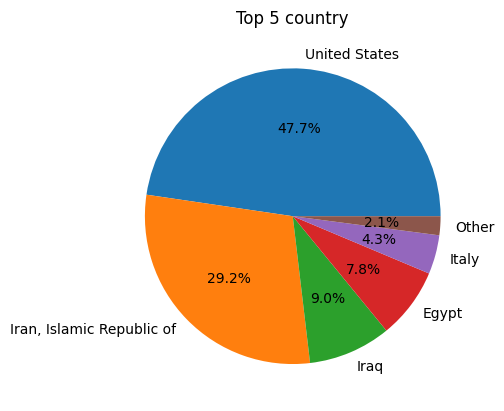

In [25]:
plt.pie(combined_categories, labels=combined_categories.index, autopct='%1.1f%%', startangle=0)
plt.title('Top 5 country')
plt.show()

# telegram chat gender finding

export telegram chat group in windows version and load it

In [26]:
with open('result.json') as f:
    data = json.load(f)

Get the names of individuals who have sent at least one message in the group:

In [27]:
names = []
id_set = set()
for msg in data['messages']:
    if not msg.get('from'):
        continue
    if msg['from_id'] in id_set:
        continue
    id_set.add(msg['from_id'])
    names.append(msg['from'])

get the first_name and filter it:

In [28]:
first_names = [n.split()[0] for n in names]
first_names = list(filter(lambda fn: len(fn) > 2, first_names))

most common names in group:

In [29]:
Counter(first_names).most_common(10)

[('Ali', 48),
 ('Mohammad', 37),
 ('Amir', 26),
 ('Maryam', 21),
 ('Zahra', 17),
 ('Alireza', 14),
 ('Fateme', 13),
 ('Reza', 12),
 ('Sina', 11),
 ('Erfan', 11)]

make a DataFrame from these names:

In [30]:
df_chat = pd.DataFrame(
    {
        'names' : first_names
    }
)

In [31]:
df_chat['gender'] = df_chat['names'].apply(name_to_gender)

In [32]:
df_chat

,names,gender
0,a.20,None
1,Sobhan,Male
2,Good,Male
3,Sima,Female
4,hwsyn.si,None
...,...,...
1379,Mary,Female
1380,Saeid,Male
1381,ᴀᴍɪʀᴀʟɪ,None
1382,Ali,Male


In [33]:
df_chat['gender'].value_counts()

gender
Male      651
Female    476
Name: count, dtype: int64

In [34]:
non_count = df_chat['gender'].isna().sum()
non_count

257

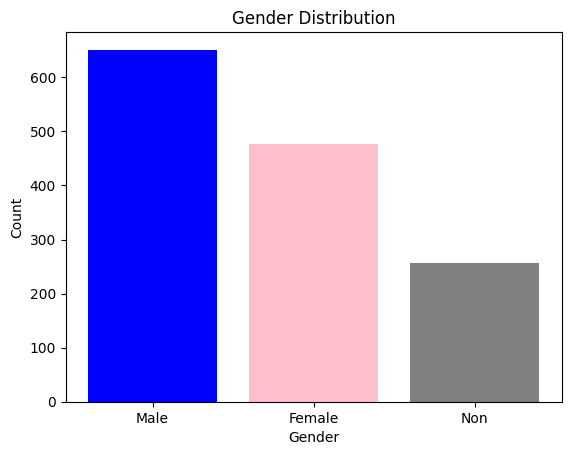

In [35]:
genders = ['Male', 'Female', 'Non']
counts = [651, 476, non_count]

# Create a bar chart
plt.bar(genders, counts, color=['blue', 'pink', 'gray'])

# Add labels and a title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

In [36]:
print('hi')

hi
